In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Kaggle_Quora_Project/train_csv.zip

Archive:  /content/drive/MyDrive/Kaggle_Quora_Project/train_csv.zip
  inflating: train.csv               


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
262924,262924,379376,379377,How can I get good score I cat 2016 if I start...,Is there any evidence that democrats or indepe...,0
295238,295238,417256,255171,How much does a ship broker in Singapore earn ...,How much money does Bill Gates make per second?,0
228688,228688,337825,337826,What is a class data-type in java?,How can technology companies drive traffic to ...,0
320311,320311,334871,68941,How can I get enrolled in the best universitie...,Which university is the best to study medicine...,0
373659,373659,401945,504502,How useful has Khan Academy been to you?,Is Khan Academy useful for engineering students?,1
189275,189275,287990,287991,"Why is the term ""Jupiter's cock"" used so frequ...",What are some movies like Spartacus?,0
253054,253054,367522,367523,I have auditions for farewell anchoring tomorr...,How can I find a good monologue for an audition?,0
399403,399403,198443,532664,How do you syndicate a loan?,What is a syndicated loan?,0
104741,104741,172871,172872,What is the best budget camera phone?,Is someone spying on me through my cell phone ...,0
78336,78336,133594,133595,Does Switzerland have a reputation for racism?,Is Switzerland a racist country?,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# Handling missing values
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
# Duplicate rows check
df.duplicated().sum()

0

<Axes: >

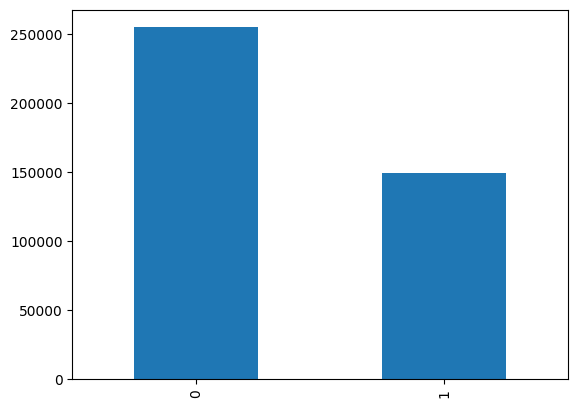

In [ ]:
# Distribution of is_duplicate
df['is_duplicate'].value_counts().plot(kind = 'bar')

A little unbalanced data

In [ ]:
# Repeated questions
qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])
x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [ ]:
qid

0              1
1              3
2              5
3              7
4              9
           ...  
808575    379845
808576    155606
808577    537929
808578    537931
808579    537933
Length: 808580, dtype: int64